In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import tkinter as tk
from tkinter import filedialog
from PIL import Image
import os

2024-09-30 18:44:59.374852: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
root='Flood_images'
images=os.listdir(root)

In [3]:
img_height, img_width = 150, 150
batch_size = 32
epochs = 50

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)


In [5]:
train_generator = train_datagen.flow_from_directory(
    'Flood_images',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

Found 81 images belonging to 2 classes.


In [6]:
validation_generator = train_datagen.flow_from_directory(
    'Flood_images',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 19 images belonging to 2 classes.


In [7]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

/Users/adityapatil/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [8]:
model.compile(
    optimizer=Adam(),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [9]:
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

Epoch 1/50


/Users/adityapatil/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.5319 - loss: 0.8297 - val_accuracy: 0.9474 - val_loss: 0.2351
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.9104 - loss: 0.3432 - val_accuracy: 0.9474 - val_loss: 0.3679
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.8707 - loss: 0.3979 - val_accuracy: 0.9474 - val_loss: 0.2063
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.9155 - loss: 0.3555 - val_accuracy: 0.9474 - val_loss: 0.2223
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.8990 - loss: 0.3844 - val_accuracy: 0.9474 - val_loss: 0.2677
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.8998 - loss: 0.3580 - val_accuracy: 0.9474 - val_loss: 0.2941
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.8906 - loss: 0.3506 - val_accuracy: 0.9474 - val_loss: 0.2282
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.9206 - loss: 0.2986 - val_accuracy: 0.9474 - val_loss: 0.2110
Epoch 9/50
3/3 ━━━━━━━━

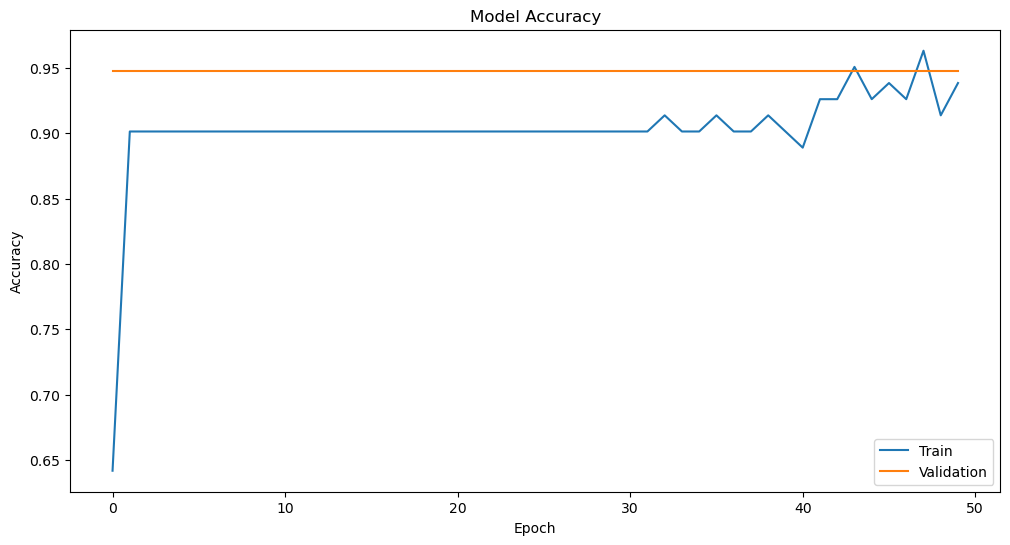

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

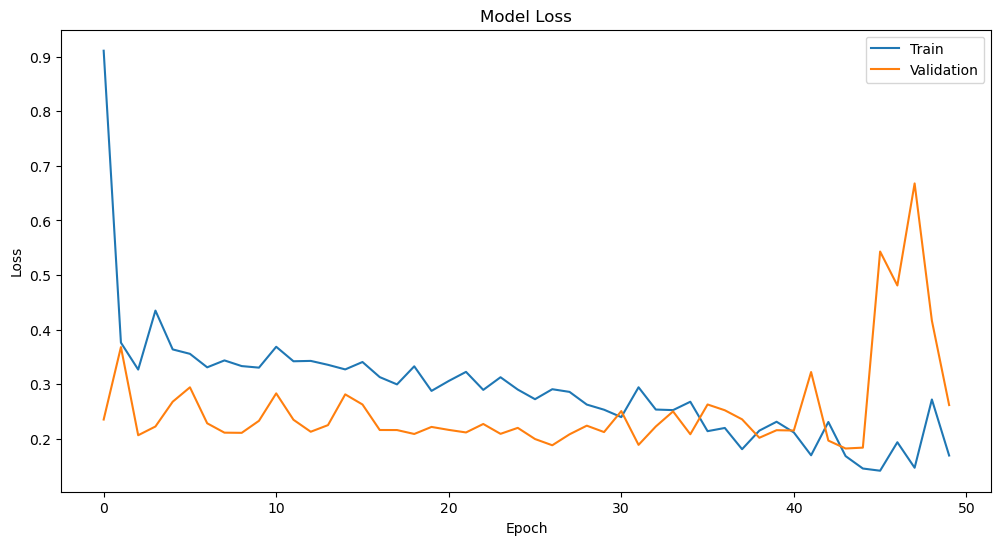

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

In [12]:
model.save('flood_classifier_model.h5')


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,102,533 (217.83 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 38,068,356 (145.22 MB)

In [17]:

root = tk.Tk()
root.withdraw()  
file_path = filedialog.askopenfilename()


img = Image.open(file_path)
img = img.resize((img_height, img_width))  
img_array = np.array(img) / 255.0  
img_array = np.expand_dims(img_array, axis=0)  

prediction = model.predict(img_array)
result = ' No Flood' if prediction[0] > 0.5 else 'Flood'
print(f"Prediction: {result}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Prediction:  No Flood


In [ ]:
model.save('flood_classifier_model.h5')